# Web Integration

## Web Basics

### ftplib

In [1]:
import ftplib
import numpy as np

In [2]:
ftp = ftplib.FTP('quant-platform.com')

In [93]:
#   Need User/Password
#ftp.login(user='python', passwd='python')

In [5]:
np.save('./data/array', np.random.standard_normal((100, 100)))

In [6]:
f = open('./data/array.npy', 'r')

In [94]:
#ftp.storbinary('STOR array.npy', f)

In [95]:
#ftp.retrlines('LIST')

In [9]:
f = open('./data/array_ftp.npy', 'wb').write

In [96]:
#ftp.retrbinary('RETR array.npy', f)

In [97]:
#ftp.delete('array.npy')

In [98]:
#ftp.retrlines('LIST')

In [13]:
ftp.close()

In [14]:
#!ls -n ./data

In [15]:
#!rm -f ./data/arr*
  # clean-up directory

In [16]:
ftps = ftplib.FTP_TLS('quant-platform.com')

In [99]:
# Need User/Password
#ftps.login(user='python', passwd='python')

In [17]:
ftps.prot_p()

'200 PROT now Private.'

In [18]:
ftps.retrlines('LIST')

'226 Directory send OK.'

In [19]:
ftps.close()

### httplib

In [100]:
import httplib

In [101]:
http = httplib.HTTPConnection('hilpisch.com')

In [102]:
http.request('GET', '/index.htm')

In [103]:
resp = http.getresponse()

In [104]:
resp.status, resp.reason

(200, 'OK')

In [105]:
content = resp.read()
content[:100]
  # first 100 characters of the file

'<!doctype html>\n<html lang="en">\n\n\t<head>\n\t\t<meta charset="utf-8">\n\n\t\t<title>Dr. Yves J. Hilpisch \xe2\x80'

In [106]:
index = content.find(' E ')
index

2294

In [107]:
content[index:index + 29]

' E contact [at] dyjh [dot] de'

In [108]:
http.close()

### urllib

In [109]:
import urllib

In [110]:
url = 'http://ichart.finance.yahoo.com/table.csv?g=d&ignore=.csv'
url += '&s=YHOO&a=01&b=1&c=2014&d=02&e=6&f=2014'

In [111]:
#connect = urllib.urlopen(url)

In [112]:
#data = connect.read()
data = pd.read_csv('data/msft.csv')
data[:5]

,Date,Open,High,Low,Close,Volume,Adj Close
0,25-Oct-17,78.58,79.10,78.01,78.63,20410808,78.63
1,24-Oct-17,78.90,79.20,78.46,78.86,17349600,78.86
2,23-Oct-17,78.99,79.34,78.76,78.83,20627200,78.83
3,20-Oct-17,78.32,78.97,78.22,78.81,22866400,78.81
4,19-Oct-17,77.57,77.93,77.35,77.91,15092800,77.91


In [113]:
print data

          Date   Open   High    Low  Close    Volume  Adj Close
0    25-Oct-17  78.58  79.10  78.01  78.63  20410808      78.63
1    24-Oct-17  78.90  79.20  78.46  78.86  17349600      78.86
2    23-Oct-17  78.99  79.34  78.76  78.83  20627200      78.83
3    20-Oct-17  78.32  78.97  78.22  78.81  22866400      78.81
4    19-Oct-17  77.57  77.93  77.35  77.91  15092800      77.91
5    18-Oct-17  77.67  77.85  77.37  77.61  13300700      77.61
6    17-Oct-17  77.47  77.62  77.25  77.59  16824000      77.59
7    16-Oct-17  77.42  77.81  77.35  77.65  12380100      77.65
8    13-Oct-17  77.59  77.87  77.29  77.49  15335700      77.49
9    12-Oct-17  76.49  77.29  76.37  77.12  16876500      77.12
10   11-Oct-17  76.36  76.46  75.95  76.42  15388900      76.42
11   10-Oct-17  76.33  76.63  76.14  76.29  13944500      76.29
12    9-Oct-17  75.97  76.55  75.86  76.29  11386500      76.29
13    6-Oct-17  75.67  76.03  75.54  76.00  13959800      76.00
14    5-Oct-17  75.22  76.12  74.96  75.

In [32]:
url = 'http://ichart.finance.yahoo.com/table.csv?g=d&ignore=.csv'
url += '&%s'  # for replacement with parameters
url += '&d=06&e=30&f=2014'

In [33]:
params = urllib.urlencode({'s': 'MSFT', 'a': '05', 'b': 1, 'c': 2014})

In [34]:
params

'a=05&s=MSFT&b=1&c=2014'

In [35]:
url % params

'http://ichart.finance.yahoo.com/table.csv?g=d&ignore=.csv&a=05&s=MSFT&b=1&c=2014&d=06&e=30&f=2014'

In [36]:
#connect = urllib.urlopen(url % params)

In [37]:
#data = connect.read()
data = pd.read_csv('data/msft.csv')

In [38]:
print data

          Date   Open   High    Low  Close    Volume  Adj Close
0    25-Oct-17  78.58  79.10  78.01  78.63  20410808      78.63
1    24-Oct-17  78.90  79.20  78.46  78.86  17349600      78.86
2    23-Oct-17  78.99  79.34  78.76  78.83  20627200      78.83
3    20-Oct-17  78.32  78.97  78.22  78.81  22866400      78.81
4    19-Oct-17  77.57  77.93  77.35  77.91  15092800      77.91
5    18-Oct-17  77.67  77.85  77.37  77.61  13300700      77.61
6    17-Oct-17  77.47  77.62  77.25  77.59  16824000      77.59
7    16-Oct-17  77.42  77.81  77.35  77.65  12380100      77.65
8    13-Oct-17  77.59  77.87  77.29  77.49  15335700      77.49
9    12-Oct-17  76.49  77.29  76.37  77.12  16876500      77.12
10   11-Oct-17  76.36  76.46  75.95  76.42  15388900      76.42
11   10-Oct-17  76.33  76.63  76.14  76.29  13944500      76.29
12    9-Oct-17  75.97  76.55  75.86  76.29  11386500      76.29
13    6-Oct-17  75.67  76.03  75.54  76.00  13959800      76.00
14    5-Oct-17  75.22  76.12  74.96  75.

In [40]:
#urllib.urlretrieve(url % params, './data/msft.csv')

In [41]:
csv = open('./data/msft.csv', 'r')
csv.readlines()[:5]

['Date,Open,High,Low,Close,Volume,Adj Close\n',
 '25-Oct-17,78.58,79.1,78.01,78.63,20410808,78.63\n',
 '24-Oct-17,78.9,79.2,78.46,78.86,17349600,78.86\n',
 '23-Oct-17,78.99,79.34,78.76,78.83,20627200,78.83\n',
 '20-Oct-17,78.32,78.97,78.22,78.81,22866400,78.81\n']

In [42]:
!rm -f ./data/*

'rm' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


## Web Plotting

### Static Plots

In [43]:
import numpy as np
import pandas as pd
%matplotlib inline

In [44]:
url = 'http://ichart.yahoo.com/table.csv?s=MSFT&a=0&b=1&c=2009'
#data = pd.read_csv(url, parse_dates=['Date'])
data = pd.read_csv('data/msft.csv')

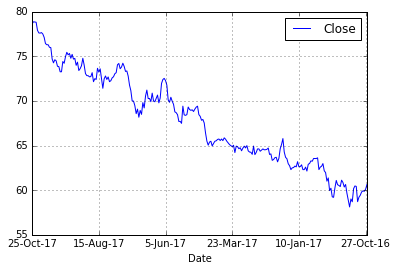

In [45]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
data.plot(x='Date', y='Close', grid=True, ax=ax)
# tag: microsoft
# title: Historical stock prices for Microsoft since January 2009 (+matplotlib+)

### Interactive Plots

**REMARK**: The original version used Bokeh for Web plotting. Plotly seems to be the more easy and intuitive way for generating interactive D3.js Web plots.

In [46]:
#  conda install plotly
#  conda install cufflinks
import plotly.plotly as py
#import cufflinks as cf
py.sign_in('Python-Demo-Account', 'gwt101uhh0')

In [48]:
# transforming the above mpl figure
# to interactive D3.js plot
#py.iplot_mpl(fig)

In [50]:
# direct approach with Cufflinks
#data.set_index('Date')['Close'].iplot(world_readable=True)

### Real-Time Plots

#### Real-Time FX Data

In [51]:
import time
import pandas as pd
import datetime as dt
import requests

In [52]:
#url = 'http://api-sandbox.oanda.com/v1/prices?instruments=%s'
#instrument = 'EUR_USD'
#api = requests.get(url % instrument)

  # real-time FX (dummy!) data from JSON API

In [64]:
#Need  Password and Authority
url = 'http://api-sandbox.oanda.com/v1/prices?instruments=EUR_USD'
#api = requests.get(url)

In [67]:
#data = api.json()
#data

In [69]:
#data = data['prices'][0]
#data

In [71]:
#ticks = pd.DataFrame({'bid': data['bid'],
#                      'ask': data['ask'],
#                      'instrument': data['instrument'],
#                      'time': pd.Timestamp(data['time'])},
#                      index=[pd.Timestamp(data['time']),])
  # initialization of ticks DataFrame

In [56]:
ticks[['ask', 'bid', 'instrument']]

,ask,bid,instrument
2015-08-08 09:57:19.523848+00:00,1.24073,1.24059,EUR_USD


#### Real-Time Stock Price Quotes

In [72]:
url1 = 'http://www.netfonds.no/quotes/posdump.php?'
url2 = 'date=%s%s%s&paper=%s.N&csv_format=csv'
url = url1 + url2

In [73]:
# must be a business day
today = dt.datetime.now()
y = '%d' % today.year
  # current year
m = '%02d' % today.month
  # current month, add leading zero if needed
d = '%02d' % today.day
  # current day, add leading zero if needed
sym = 'NKE'
  # Nike Inc. stocks

In [74]:
y, m, d, sym

('2017', '10', '27', 'NKE')

In [75]:
urlreq = url % (y, m, d, sym)
urlreq

'http://www.netfonds.no/quotes/posdump.php?date=20171027&paper=NKE.N&csv_format=csv'

In [76]:
data = pd.read_csv(urlreq, parse_dates=['time'])
  # initialize DataFrame object

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 7 columns):
time                 57 non-null datetime64[ns]
bid                  57 non-null float64
bid_depth            57 non-null int64
bid_depth_total      57 non-null int64
offer                57 non-null float64
offer_depth          57 non-null int64
offer_depth_total    57 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 3.2 KB


## Rapid Web Applications

### Traders' Chat Room

### Data Modeling

### The Python Code

#### Imports and Database Preliminaries

#### Core Functionality

### Templating

In [78]:
'%d, %d, %d' % (1, 2, 3)

'1, 2, 3'

In [79]:
'{}, {}, {}'.format(1, 2, 3)

'1, 2, 3'

In [80]:
'{}, {}, {}'.format(*'123')

'1, 2, 3'

In [81]:
templ = '''<!doctype html>
  Just print out <b>numbers</b> provided to the template.
  <br><br>
  {% for number in numbers %}
    {{ number }}
  {% endfor %}
'''

In [82]:
from jinja2 import Template

In [83]:
t = Template(templ)

In [84]:
html = t.render(numbers=range(5))

In [85]:
html

u'<!doctype html>\n  Just print out <b>numbers</b> provided to the template.\n  <br><br>\n  \n    0\n  \n    1\n  \n    2\n  \n    3\n  \n    4\n  '

In [86]:
from IPython.display import HTML
HTML(html)

### Styling

In [87]:
import os
for path, dirs, files in os.walk('../python/tradechat'):
  print path
  for f in files:
    print f

../python/tradechat
tables.sql
tradechat.db
tradechat.py
../python/tradechat\static
style.css
../python/tradechat\templates
layout.html
login.html
register.html
show_entries.html


## Web Services

### The Financial Model

### The Implementation

In [88]:
import sys
sys.path.append("../python/volservice")
  # adjust if necessary to your path

In [89]:
from werkzeug.wrappers import Request, Response 

In [90]:
from vol_pricing_service import get_option_value

In [91]:
def application(environ, start_response):
    request = Request(environ)
      # wrap environ in new object
    text = get_option_value(request.args)
      # provide all paramters of the call to function
      # get back either error message or option value
    response = Response(text, mimetype='text/html')
      # generate response object based on the returned text
    return response(environ, start_response)

In [92]:
import numpy as np
import urllib
url = 'http://localhost:4000/'

## Conclusions

## Further Reading